# Research on car sales ads

>Purpose: to study vehicle advertisement data collected over the last few years and determine which factors influence the price of a vehicle. 

# Summary

A report to determine which factors influence the price of a vehicle was prepared by studying vehicle advertisement data collected over the last few years from the website titled "Crankshaft List".

Missing values were discernible for the variables 'model_year', 'cylinders', 'odometer', 'paint_color', and 'is_4wd' along with unsuitable data types for some variables that were of real number data types (ie. 'model_year', 'cylinders', 'odometer', and 'is_4wd'). These were changed to either an object or integer type depending on whether it is categorical or quantitative because it is more reasonable to do so (eg. the year is not expressed in a number with a decimal). Missing values for ‘model_year’ only accounted for 7% of the entire data and so a decision was made to remove the rows that do not have an entry for a vehicle's year. For ‘odometer’, missing values were replaced with the median since the average was less, indicating that high extreme values are pulling the mean up. 0 was used as a placeholder for missing values in ‘cylinders’ for a series of data type replacement actions to take place resulting in a new variable ('cylinders_str') to be created. However, in the event that data analysis requires values to be numerical, the placeholder 0 will represent an unknown number of cylinders. Missing values in ‘paint_color’ were added to the category of custom since assigning Unknown would only add another category which is unnecessary because a "custom" colour might as well be unknown anyway. There was a small amount of data for the colours yellow, orange, and purple compared to the others, and so they were also added to the custom category. Finally, all missing values for 'is_4wd' were replaced with 0, where the assumption is 1 = yes and 0 = no (for having 4wd). All of the values were then converted to int64 for a cleaner look.

String values in 'condition' were replaced with a numeric scale where: new = 5, like new = 4, excellent = 3, good = 2, fair = 1, salvage = 0. Columns were added for the day of the week, month, and year an ad was placed as well as a vehicle's age (in years) and the average mileage per year (from when the ad was placed).

Exploratory analysis was carried out on a vehicle’s price, age, mileage, number of cylinders, vehicle condition, and the number of days the ad was listed. Prices up to `$20,000` were filtered to be used for further analysis since the outliers are most perceived after the third quartile which consequently lowered the average price for each type of vehicle around `$8737`. A right-skewed distribution was observed upon generating a histogram for ‘vehicle_age’ suggesting outliers on the high end of the scale are pulling the average up. Vehicles that are aged 20 years or less were filtered to be used for further analysis since the outliers are most perceived after the third quartile which resulted in a normalized new histogram. A vehicle's mileage up to 250,000 were filtered to be used for further analysis since the outliers are most perceived after the third quartile which also normalized the respective histogram. A multimodal distribution is observed from the ‘cylinders’ histogram suggesting that there are at least three distinct groups of the number of cylinders a vehicle has—particularly vehicles that have 4, 6, or 8 cylinders. A similar observation (ie. a multimodal distribution) was discernible for a vehicle’s condition which suggests that there are many distinct types of vehicle conditions where most vehicles being sold are in excellent condition. Vehicles that are salvaged or in new condition appear to be outliers in this parameter and were not used for further analysis.

On average, the typical lifetime of a vehicle ad is around 39 days with most ads accruing around 33 days. The data implies that where ads were removed quickly and where the least number of days a vehicle's ad was placed is 0 days, and when they were listed for an abnormally long time as well as the most number of days a vehicle's ad has been placed is 271 days.

The number of ads and the average price for each type of vehicle was analyzed to observe their dependency on each other. The data suggested an inverse relationship between the number of advertisements and the average vehicle price (ie. an increase in ad quantity and a decrease in average vehicle price), however there is a weak connection between these two variables in consideration for a vehicle’s value (r = -0.020204). SUVs and sedans were chosen as representation for investigating what factors impact vehicle price the most. Analyzing whether the price depends on age, mileage, condition, transmission type, and color between the two most popular vehicle types yielded similar results. Both types showed that the black colour increases a vehicle’s price (with addition to the white colour for sedans) and that the green colour (with addition to the brown colour for sedans) decreases a vehicle’s price. Moreover, both types show a decrease in price for “other” transmission. However, SUV-type vehicles exhibited a higher priced value if it had manual transmission as compared to sedans where it has higher value with automatic transmission. It would also make sense that the price of a vehicle will decrease the more mileage a vehicle accrues as well as a vehicle’s age decreasing the value as the vehicle gets older which is consistent between the observations of SUVs and sedans. Lastly, vehicles that are in like new, excellent, or good condition are higher priced than a vehicle that is of fair condition. 

## Open the data file and study the general information. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

price_data = pd.read_csv('/datasets/vehicles_us.csv')
price_data.info()
price_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


### Conclusion

Upon looking at the general information for the data given, missing values are discernible for the variables 'model_year', 'cylinders', 'odometer', 'paint_color', and 'is_4wd'. Additionally, some variables do not have appropriate data types such as real number data types (ie. 'model_year', 'cylinders', 'odometer', and 'is_4wd') and will be changed to either an object or integer type depending on whether it is categorical or quantitative because it is more reasonable to do so (eg. the year is not expressed in a number with a decimal).

## Data preprocessing

In [2]:
# determining proportion of missing values for variables
price_data.isna().sum() / price_data.shape[0]

price           0.000000
model_year      0.070238
model           0.000000
condition       0.000000
cylinders       0.102086
fuel            0.000000
odometer        0.153168
transmission    0.000000
type            0.000000
paint_color     0.179854
is_4wd          0.503697
date_posted     0.000000
days_listed     0.000000
dtype: float64

In [3]:
# processing missing values and data type replacement for 'model_year'
price_data.dropna(subset=['model_year'], inplace=True)
price_data['model_year'] = price_data['model_year'].astype('int64')

count     40563.000000
mean     115425.444099
std       65219.802462
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64


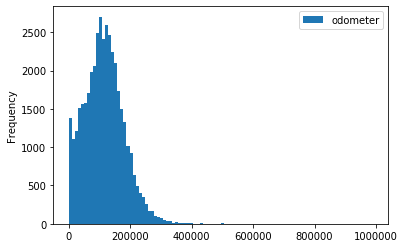

In [4]:
# analyzing the relationship between 'odometer' average and median to best fill NaN values
print(price_data['odometer'].describe())
price_data.plot(kind='hist', y='odometer', bins=100)
price_data['odometer'] = price_data['odometer'].fillna(price_data['odometer'].median())

In [5]:
# processing missing values and data type replacement for 'cylinder'
price_data['cylinders'] = price_data['cylinders'].fillna(value=0)
price_data['cylinders'] = price_data['cylinders'].astype('int64')
price_data['cylinders_str'] = price_data['cylinders'].astype('str').replace('0', 'Unknown')
price_data['cylinders_str'].value_counts()

8          14705
6          14648
4          12856
Unknown     4897
10           517
5            248
3             33
12             2
Name: cylinders_str, dtype: int64

In [6]:
# processing missing values in 'paint_color'
price_data['paint_color'] = price_data['paint_color'].fillna(value='custom')
price_data['paint_color'] = price_data['paint_color'].replace(['yellow', 'orange', 'purple'], 'custom')
price_data['paint_color'].value_counts()

custom    10230
white      9324
black      7176
silver     5811
grey       4686
blue       4143
red        4138
green      1278
brown      1120
Name: paint_color, dtype: int64

In [7]:
# processing missing values in 'is_4wd'
print('Value counts of vehicle type where is_4wd is missing:')
print(price_data[price_data['is_4wd'].isnull()]['type'].value_counts())
print()
print('Types of vehicles:')
print(price_data['type'].value_counts())

Value counts of vehicle type where is_4wd is missing:
sedan          10789
SUV             3290
truck           2782
coupe           2089
pickup          1820
mini-van        1040
hatchback        828
van              555
wagon            430
convertible      370
other            117
bus               24
offroad            8
Name: type, dtype: int64

Types of vehicles:
truck          11517
SUV            11486
sedan          11306
pickup          6484
coupe           2158
wagon           1431
mini-van        1075
hatchback        974
van              594
convertible      419
other            234
offroad          204
bus               24
Name: type, dtype: int64


In [8]:
# processing missing values in 'is_4wd'
price_data['is_4wd'] = price_data['is_4wd'].fillna(value=0).astype('int64')
price_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47906 entries, 0 to 51524
Data columns (total 14 columns):
price            47906 non-null int64
model_year       47906 non-null int64
model            47906 non-null object
condition        47906 non-null object
cylinders        47906 non-null int64
fuel             47906 non-null object
odometer         47906 non-null float64
transmission     47906 non-null object
type             47906 non-null object
paint_color      47906 non-null object
is_4wd           47906 non-null int64
date_posted      47906 non-null object
days_listed      47906 non-null int64
cylinders_str    47906 non-null object
dtypes: float64(1), int64(5), object(8)
memory usage: 5.5+ MB


### Conclusion

To reiterate, missing values are identified for the variables 'model_year', 'cylinders', 'odometer', 'paint_color', and 'is_4wd'. These missing values were present possibly due to the seller not knowing the particular details of the vehicle that they posted an ad for. The following details different preprocessing actions carried out for the different variables:

'model_year': Since the number of missing values for 'model_year' only accounts for 7% of the entire data, a decision was made to remove the rows that do not have an entry for a vehicle's year. The values were also converted to _int64_ because a time period in years is not expressed as a number with a decimal.

'odometer': The histogram for 'odometer' illustrates a distribution that is skewed right which corroborates with the relationship between the mean and median—the average is greater than the median indicating that high extreme values are pulling the mean up. For this reason, missing values for 'odometer' is replaced with the median. 

'cylinders': Missing values were replaced with 0 as a placeholder for a series of data type replacement actions to take place. First, the values were converted to _int64_ data type to have the values be whole numbers. A new variable called 'cylinders_str' was created in order for conversion to a _string_ to be possible so that the 0 values can be renamed to 'Unknown'. This was all done due to the nature that the number of cylinders a vehicle has is categorical. In the event that data analysis requires values to be numerical, the placeholder 0 will represent an unknown number of cylinders.

'paint_color': Missing values were added to the category of _custom_ since assigning _Unknown_ would only add another category which is unnecessary because a "custom" colour might as well be unknown anyway. There was a small amount of data for the colours yellow, orange, and purple compared to the others, and so they were also added to the _custom_ category.

'is_4wd': The relationship between where missing values are identified within different vehicle types were analyzed. These missing values were possibly meant to convey that a vehicle does not have 4wd instead of having a value of 0 to indicate as such, although further analysis was carried out to be more certain. It makes sense that 4wd is an option for certain vehicles, that is, not all vehicles will come with 4wd. Additionally upon further research, it would seem that buses are not usually constructed with 4wd, and so it makes sense to observe that for all busses listed that all 24 listings had a missing value for 'is_4wd'. Consequently, all missing values for 'is_4wd' were replaced with 0, where the assumption is 1 = yes and 0 = no (for having 4wd). All of the values were then converted to _int64_ for a cleaner look.

## Make calculations and add them to the table

In [9]:
# replacing string values in 'condition' with a numeric scale
def condition_scale(row):
    condition_row = row['condition']
    if condition_row == 'new':
        return 5
    if condition_row == 'like new':
        return 4
    if condition_row == 'excellent':
        return 3
    if condition_row == 'good':
        return 2
    if condition_row == 'fair':
        return 1
    if condition_row == 'salvage':
        return 0

price_data['condition_scaled'] = price_data.apply(condition_scale, axis=1)

# calculating day of the week, month, and year the ad was placed
price_data['date_posted'] = pd.to_datetime(price_data['date_posted'], format='%Y-%m-%d')
price_data['dayofweek_posted'] = price_data['date_posted'].dt.day_name()
price_data['month_posted'] = price_data['date_posted'].dt.month
price_data['year_posted'] = price_data['date_posted'].dt.year

# calculating the vehicle's age (in years) when the ad was placed
price_data['vehicle_age'] = 2021 - price_data['model_year']

# calculating the vehicle's average mileage per year
price_data['avg_miles_per_year'] = price_data['odometer'] / price_data['vehicle_age']
price_data.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,cylinders_str,condition_scaled,dayofweek_posted,month_posted,year_posted,vehicle_age,avg_miles_per_year
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,custom,1,2018-06-23,19,6,2,Saturday,6,2018,10,14500.000000
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,4,4,Thursday,2,2019,8,13750.000000
3,1500,2003,ford f-150,fair,8,gas,113000.0,automatic,pickup,custom,0,2019-03-22,9,8,1,Friday,3,2019,18,6277.777778
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,4,3,Tuesday,4,2019,4,20225.750000
5,14990,2014,chrysler 300,excellent,6,gas,57954.0,automatic,sedan,black,1,2018-06-20,15,6,3,Wednesday,6,2018,7,8279.142857
6,12990,2015,toyota camry,excellent,4,gas,79212.0,automatic,sedan,white,0,2018-12-27,73,4,3,Thursday,12,2018,6,13202.000000
7,15990,2013,honda pilot,excellent,6,gas,109473.0,automatic,SUV,black,1,2019-01-07,68,6,3,Monday,1,2019,8,13684.125000
8,11500,2012,kia sorento,excellent,4,gas,104174.0,automatic,SUV,custom,1,2018-07-16,19,4,3,Monday,7,2018,9,11574.888889
9,9200,2008,honda pilot,excellent,0,gas,147191.0,automatic,SUV,blue,1,2019-02-15,17,Unknown,3,Friday,2,2019,13,11322.384615
10,19500,2011,chevrolet silverado 1500,excellent,8,gas,128413.0,automatic,pickup,black,1,2018-09-17,38,8,3,Monday,9,2018,10,12841.300000


### Conclusion

String values in 'condition' were replaced with a numeric scale where: __new = 5__, __like new = 4__, __excellent = 3__, __good = 2__, __fair = 1__, __salvage = 0__. Columns were added for the day of the week, month, and year an ad was placed as well as a vehicle's age (in years) and the average mileage per year (from when the ad was placed).

## Carry out exploratory data analysis

count     47906.000000
mean      12160.465203
std       10082.453773
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16900.000000
max      375000.000000
Name: price, dtype: float64


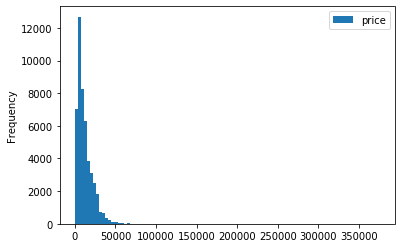

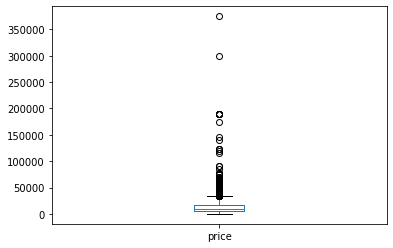

In [10]:
# exploratory analysis for 'price'
print(price_data['price'].describe())
price_data.plot(y='price', kind='hist', bins=100)
price_data.plot(y='price', kind='box')

count    47906.000000
mean        11.249530
std          6.282065
min          2.000000
25%          7.000000
50%         10.000000
75%         15.000000
max        113.000000
Name: vehicle_age, dtype: float64

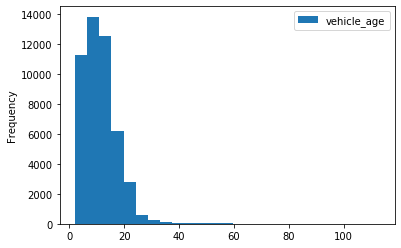

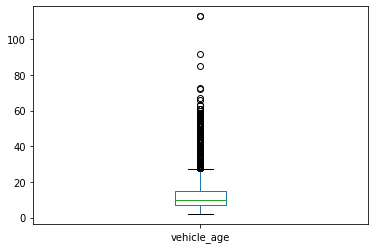

In [11]:
# exploratory analysis for 'vehicle_age'
price_data.plot(y='vehicle_age', kind='hist', bins=25)
price_data.plot(y='vehicle_age', kind='box')
price_data['vehicle_age'].describe()

count     47906.000000
mean     115053.673632
std       60019.830639
min           0.000000
25%       79000.000000
50%      113000.000000
75%      146327.000000
max      990000.000000
Name: odometer, dtype: float64


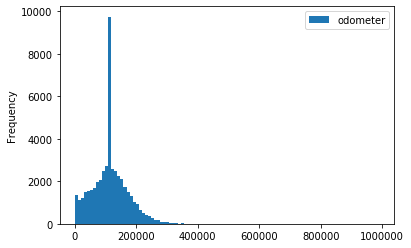

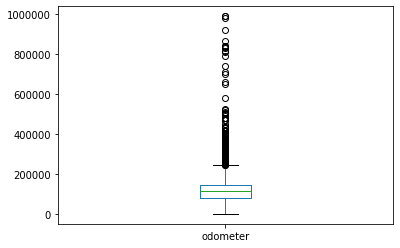

In [12]:
# exploratory analysis for 'odometer'
price_data.plot(y='odometer', kind='hist', bins=100)
price_data.plot(y='odometer', kind='box')
print(price_data['odometer'].describe())

count    47906.000000
mean         5.500042
std          2.432474
min          0.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

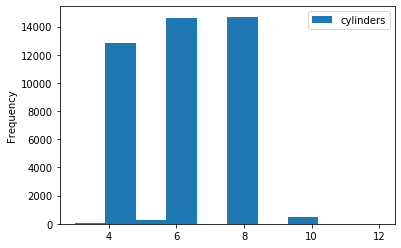

In [13]:
# exploratory analysis for 'cylinders'
price_data.plot(y='cylinders', kind='hist', range=(3,12))
price_data['cylinders'].describe()

count    47906.000000
mean         2.638605
std          0.711839
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: condition_scaled, dtype: float64


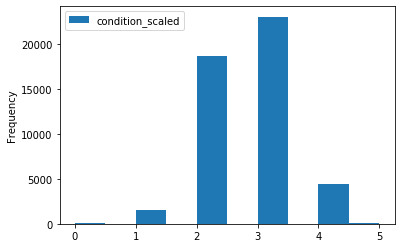

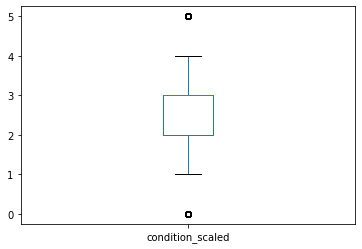

In [14]:
# exploratory analysis for 'condition_scaled'
price_data.plot(y='condition_scaled', kind='hist')
price_data.plot(y='condition_scaled', kind='box')
print(price_data['condition_scaled'].describe())

### Conclusion

Exploratory analysis was carried out on ‘price’, ‘vehicle_age’, ‘odometer’, ‘cylinders’, and ‘condition_scaled’. The following was observed:

'price': Outliers on the high end of the scale are affecting the histogram for ‘price’ thus illustrating a right-skewed distribution with most of the values concentrated around `$9000`. Additionally, the density of outliers is very low since it is not discernable on the histogram such as where the maximum price listed for an ad is `$375,000`. 

'vehicle_age': Outliers on the high end of the scale are affecting the histogram thus illustrating a right-skewed distribution with most of the values concentrated around 10 years. Additionally, the density of outliers is very low since it is not discernable on the histogram where the maximum vehicle age is 113 years. 

'odometer': Outliers on the high end of the scale are affecting the histogram for ‘odometer’ thus illustrating a slightly right-skewed distribution with most of the values concentrated around 113,000 miles. Additionally, the density of outliers is very low since it is not discernable on the histogram where the maximum miles driven for a vehicle listed for an ad which is 990,000 miles. 

'cylinders': A multimodal distribution is observed from the histogram (after revising the range displayed due to missing values being replaced by 0 as a placeholder for an unknown number of cylinders for the vehicle) suggesting that there are at least three distinct groups of the number of cylinders a vehicle has particularly vehicles that have 4, 6, or 8 cylinders. Vehicles that have 12 cylinders could be considered an outlier since it is not noticeable on the histogram. 

'condition_scaled': A multimodal distribution is observed from the histogram suggesting that there are many distinct types of vehicle conditions where most vehicles being sold are in excellent condition. Vehicles that are salvaged or in new condition appear to be outliers in this parameter and will not be used in the new filtered DataFrame for further analysis.

count    32183.000000
mean      9004.887208
std       5131.910492
min          1.000000
25%       4995.000000
50%       7995.000000
75%      12980.000000
max      20000.000000
Name: price, dtype: float64


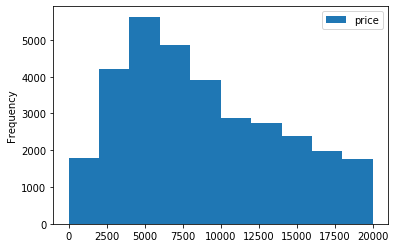

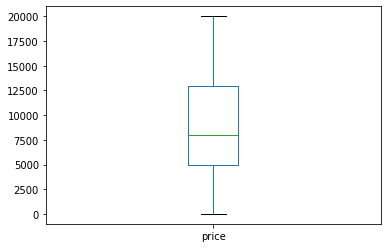

In [15]:
# creating new DataFrame for filtered data for further analyses
filtered_data = price_data.query(
    '(0 < cylinders) and (1 <= condition_scaled <= 4) and (price <= 20000) and (odometer <= 250000) and (vehicle_age <= 20)')

# using filtered data to plot new graphs for 'price'
filtered_data.plot(y='price', kind='hist')
filtered_data.plot(y='price', kind='box')
print(filtered_data['price'].describe())

count    32183.000000
mean        11.047727
std          4.347087
min          2.000000
25%          8.000000
50%         11.000000
75%         14.000000
max         20.000000
Name: vehicle_age, dtype: float64


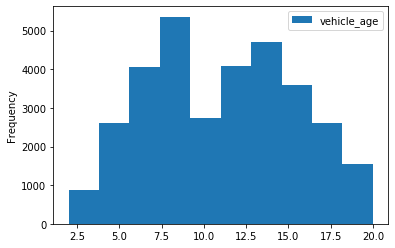

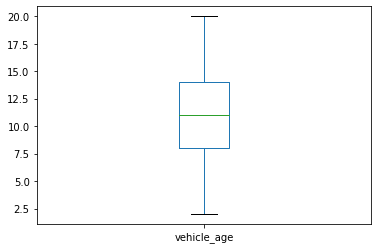

In [16]:
# using filtered data to plot new graphs for 'vehicle_age'
filtered_data.plot(y='vehicle_age', kind='hist')
filtered_data.plot(y='vehicle_age', kind='box')
print(filtered_data['vehicle_age'].describe())

count     32183.000000
mean     118127.488022
std       49500.089846
min           0.000000
25%       91193.500000
50%      113000.000000
75%      148757.500000
max      250000.000000
Name: odometer, dtype: float64


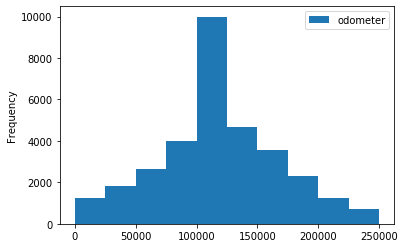

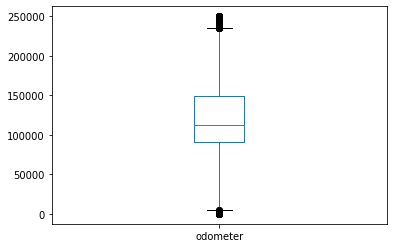

In [17]:
# using filtered data to plot new graphs for 'odometer'
filtered_data.plot(y='odometer', kind='hist')
filtered_data.plot(y='odometer', kind='box')
print(filtered_data['odometer'].describe())

count    32183.00000
mean         5.85135
std          1.67205
min          3.00000
25%          4.00000
50%          6.00000
75%          8.00000
max         12.00000
Name: cylinders, dtype: float64


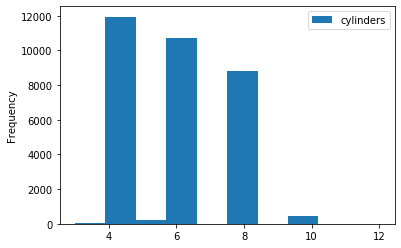

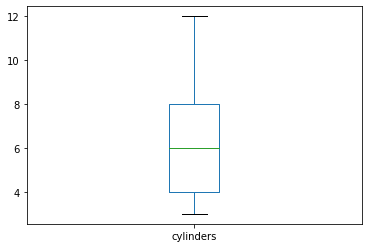

In [18]:
# using filtered data to plot new graphs for 'cylinders'
filtered_data.plot(y='cylinders', kind='hist')
filtered_data.plot(y='cylinders', kind='box')
print(filtered_data['cylinders'].describe())

count    32183.000000
mean         2.641270
std          0.665555
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          4.000000
Name: condition_scaled, dtype: float64


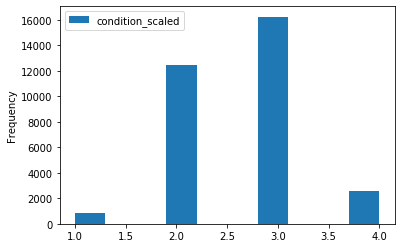

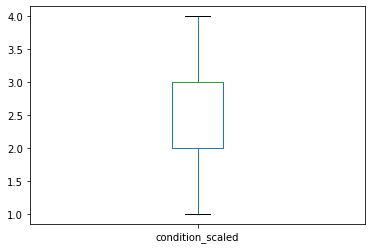

In [19]:
# using filtered data to plot new graphs for 'condition_scaled'
filtered_data.plot(y='condition_scaled', kind='hist')
filtered_data.plot(y='condition_scaled', kind='box')
print(filtered_data['condition_scaled'].describe())

### Conclusion

Exploratory analysis was carried out on the filtered data for ‘price’, ‘vehicle_age’, ‘odometer’, ‘cylinders’, and ‘condition_scaled’. The following was observed:

'price': Prices up to `$20,000` were filtered to be used for further analysis since the outliers are most perceived after the third quartile. By doing so, the resulting histogram is less right-skewed. Accordingly, the average prices for each type of vehicle is now around `$8737`.

'vehicle_age': Vehicles that are aged 20 years or less were filtered to be used for further analysis since the outliers are most perceived after the third quartile. The resulting histogram is also normalized.

'odometer': A vehicle's mileage up to 250,000 were filtered to be used for further analysis since the outliers are most perceived after the third quartile. The resulting histogram is also normalized.

'cylinders': A multimodal distribution is still apparent from the new histogram after filtering the placeholder 0's. Vehicles that have 12 cylinders are still included in the filtered dataset since the larger vehicles (ie. buses) were significant enough to be included in the original dataset and there is only a handful of data points for the respective vehicle type. 

'condition_scaled': A multimodal distribution is still apparent from the new histogram after filtering out vehicles that are salvaged or in new condition.

count    32183.000000
mean        39.609670
std         28.322701
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64


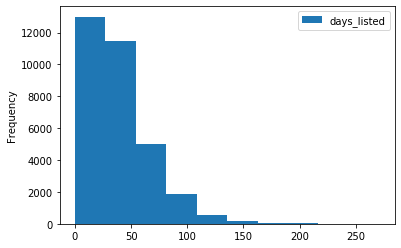

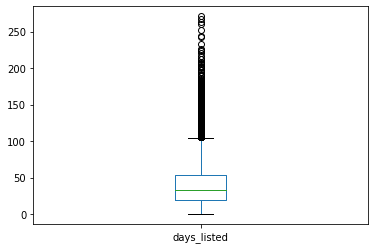

In [20]:
# exploratory analysis for 'days_listed'
filtered_data.plot(y='days_listed', kind='hist')
filtered_data.plot(y='days_listed', kind='box')
print(filtered_data['days_listed'].describe())

### Conclusion

On average, the typical lifetime of a vehicle ad is around 39 days with most ads accruing around 33 days. The data implies that where ads were removed quickly and where the least number of days a vehicle's ad was placed is 0 days, and when they were listed for an abnormally long time as well as the most number of days a vehicle's ad has been placed is 271 days.

                     mean count
                    price price
type                           
SUV           9010.612410  8429
bus           6136.600000    10
convertible  11559.898990   198
coupe         9701.788669  1112
hatchback     6700.080605   794
mini-van      7624.344710   879
offroad      11762.787234    94
other         8893.194631   149
pickup       10875.129208  3119
sedan         6985.814143  9588
truck        11543.958723  6202
van           8214.627753   454
wagon         8691.064935  1155
                 mean     count
                price     price
mean  price  1.000000 -0.020204
count price -0.020204  1.000000


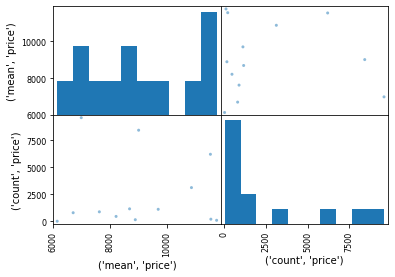

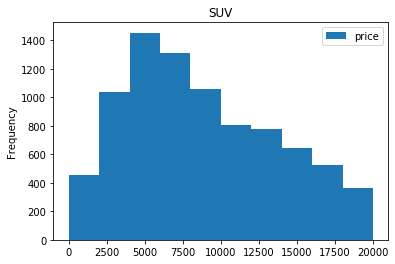

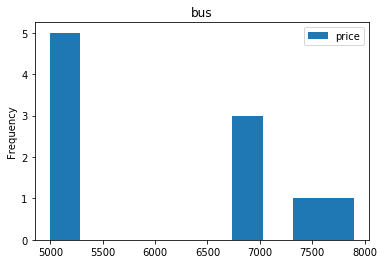

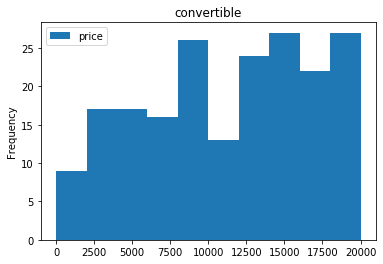

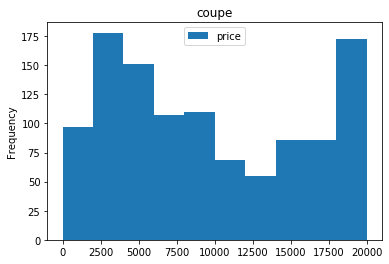

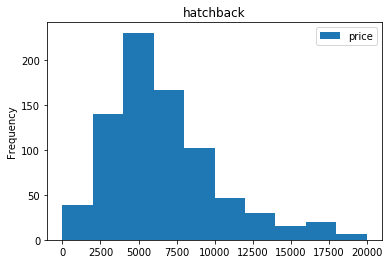

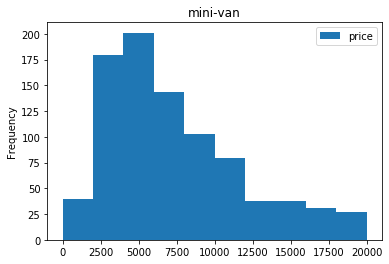

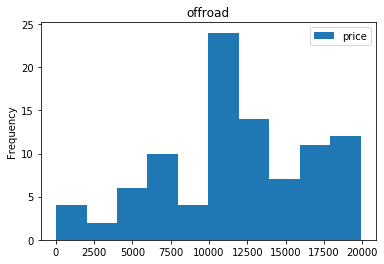

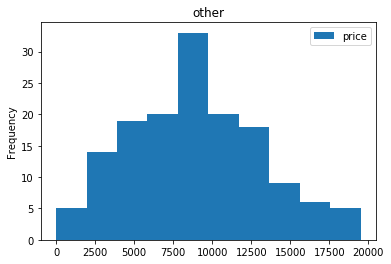

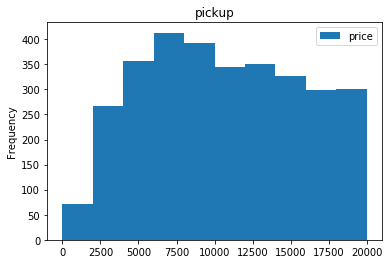

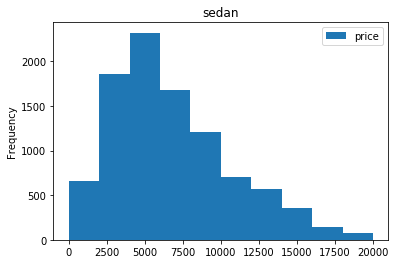

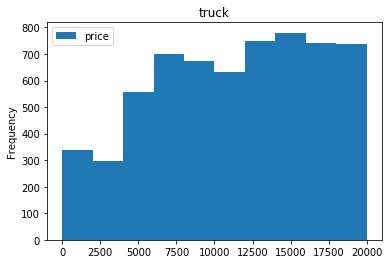

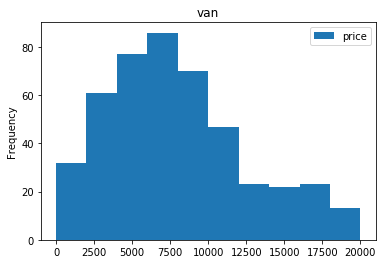

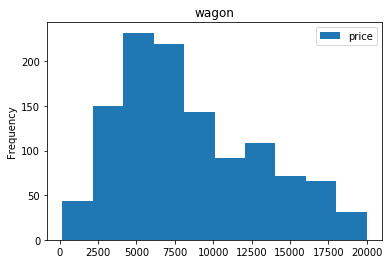

In [21]:
# analyzing the number of ads and the average price for each type of vehicle
filtered_pivot = filtered_data.pivot_table(index='type', values='price', aggfunc=['mean','count'])
print(filtered_pivot)
pd.plotting.scatter_matrix(filtered_pivot)
print(filtered_pivot.corr())
for name, group_data in filtered_data.groupby('type'):
    group_data.plot(y='price', kind='hist', title=name)

### Conclusion

The number of ads and the average price for each type of vehicle was analyzed to observe their dependency on each other. According to the Pearson correlation coefficient that was calculated (r = -0.020204), although it suggests an inverse relationship between the number of advertisements and the average vehicle price (ie. an increase in ad quantity and a decrease in average vehicle price), there is a weak connection between these two variables in consideration for a vehicle’s value. Subsequently, the two types of vehicles with the greatest number of ads, SUVs and sedans, were chosen as representation for investigating what factors impact vehicle price the most.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7facedeb8e50>,
      dtype=object)

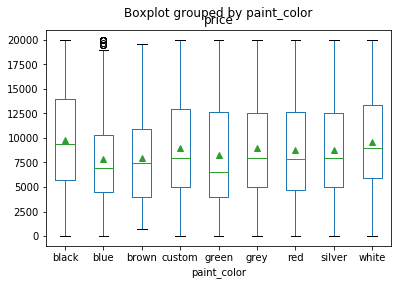

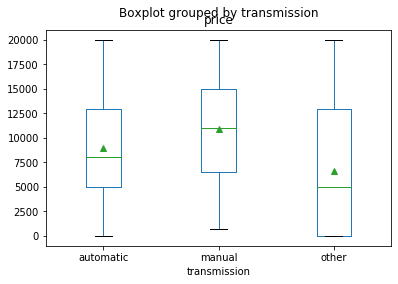

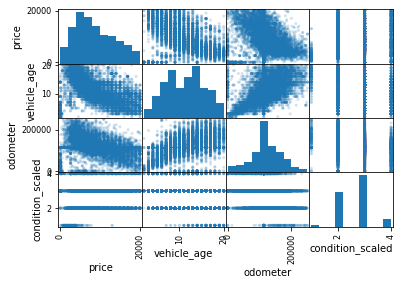

In [23]:
# analyzing what factors impact the price most for SUV vehicle type
suv_sedan = pd.DataFrame(filtered_data, columns=['type','price','vehicle_age','odometer','condition_scaled', 
                                                  'transmission','paint_color'])
suv_type = suv_sedan.query('type=="SUV"')
suv_type.boxplot(column='price', by='paint_color', grid=False, showmeans=True)
suv_type.boxplot(column='price', by='transmission', grid=False, showmeans=True)
pd.plotting.scatter_matrix(suv_type, alpha=0.2)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7facee02f290>,
      dtype=object)

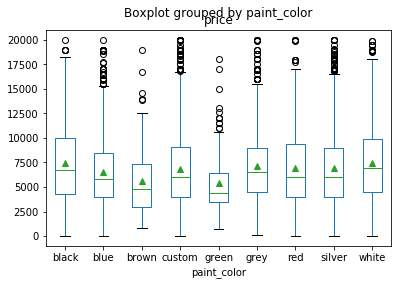

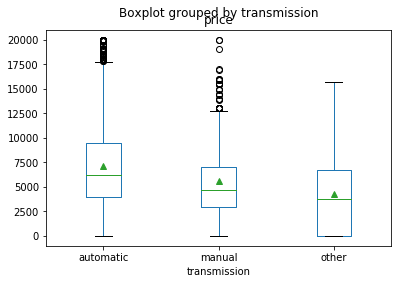

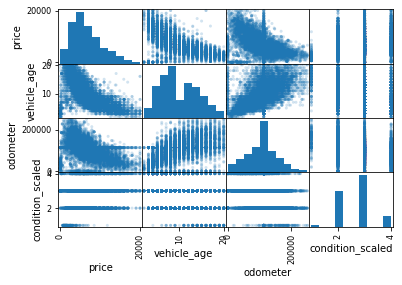

In [24]:
# analyzing what factors impact the price most for sedan vehicle type
sedan_type = suv_sedan.query('type=="sedan"')
sedan_type.boxplot(column='price', by='paint_color', grid=False, showmeans=True)
sedan_type.boxplot(column='price', by='transmission', grid=False, showmeans=True)
pd.plotting.scatter_matrix(sedan_type, alpha=0.2)

### Conclusion

For SUV-type vehicles, the data suggests that the black colour increases a vehicle’s price as well as if the vehicle has manual transmission. Lower priced SUVs are green in colour with “other” transmission. Furthermore, the price of an SUV will decrease the more mileage a vehicle accrues. Likewise, SUVs that are in like new, excellent, or good condition are higher priced than an SUV that is of fair condition. A vehicle’s age impacts price by decreasing the value as the vehicle gets older.

For sedan-type vehicles, the data suggests that the black and/or white colours increase a vehicle’s price as well as if the vehicle has automatic transmission. Lower priced sedans are brown and/or green in colour with “other” transmission. Furthermore, the price of a sedan will decrease the more mileage a vehicle accrues which is consistent with SUV-type vehicles. Likewise, sedans that are in like new, excellent, or good condition are higher priced than a sedan that is of fair condition. As mentioned before, a vehicle’s age impacts price by decreasing the value as the vehicle gets older.